### Theoretical cluster count covariances using TJPCov.
This notebook shows how to use TJPCov to calculate covariances, given a .sacc file.

We will
1. Read in an appropriate yaml file that specifies to do cluster count covariances
2. Instantiate a `CovarianceCalculator` 
3. Tell the calculator to calculate the covariances
4. Display the covariance / correlation coefficient
5. Save the covariance back to .sacc

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from tjpcov.covariance_calculator import CovarianceCalculator

def correlation(cov):
    diag = np.diag(cov)
    return cov / np.sqrt(diag[:, None] * diag[None, :])

The .yaml file contains the reference to the .sacc file - so specify which .sacc file you want to use there. You can also specify if you want to use MPI or not.

In [3]:
input_yml = './clusters/conf_covariance_clusters.yaml'
cc = CovarianceCalculator(input_yml)

All we need to do is call `get_covariance` to calculate the covariance of all classes specified in the yaml file.  For this example we are calculating the cluster count covariance SSC and Gaussian contributions.

Then, we call `create_sacc_cov` to the covariance to the sacc file.

In [4]:
cov = cc.get_covariance()
sacc_with_cov = cc.create_sacc_cov(output='mock_clusters_with_cov.sacc', save_terms=False)

Computing independent covariance blocks
Rank None: ('NC_mock_redshift_richness', 'bin_z_0', 'bin_rich_0'), ('NC_mock_redshift_richness', 'bin_z_0', 'bin_rich_0')
Rank None: ('NC_mock_redshift_richness', 'bin_z_0', 'bin_rich_0'), ('NC_mock_redshift_richness', 'bin_z_0', 'bin_rich_1')
Rank None: ('NC_mock_redshift_richness', 'bin_z_0', 'bin_rich_0'), ('NC_mock_redshift_richness', 'bin_z_0', 'bin_rich_2')
Rank None: ('NC_mock_redshift_richness', 'bin_z_0', 'bin_rich_0'), ('NC_mock_redshift_richness', 'bin_z_0', 'bin_rich_3')
Rank None: ('NC_mock_redshift_richness', 'bin_z_0', 'bin_rich_0'), ('NC_mock_redshift_richness', 'bin_z_1', 'bin_rich_0')
Rank None: ('NC_mock_redshift_richness', 'bin_z_0', 'bin_rich_0'), ('NC_mock_redshift_richness', 'bin_z_1', 'bin_rich_1')
Rank None: ('NC_mock_redshift_richness', 'bin_z_0', 'bin_rich_0'), ('NC_mock_redshift_richness', 'bin_z_1', 'bin_rich_2')
Rank None: ('NC_mock_redshift_richness', 'bin_z_0', 'bin_rich_0'), ('NC_mock_redshift_richness', 'bin_z_1'

/Users/matt/miniconda3/envs/tjpcov/lib/python3.9/site-packages/pyccl/pyutils.py:408: CCLWarning: The function halo_bias is deprecated. Use HaloBias instead.
  warnings.warn(s, CCLWarning)


Rank None: ('NC_mock_redshift_richness', 'bin_z_0', 'bin_rich_0'), ('NC_mock_redshift_richness', 'bin_z_0', 'bin_rich_1')
Rank None: ('NC_mock_redshift_richness', 'bin_z_0', 'bin_rich_0'), ('NC_mock_redshift_richness', 'bin_z_0', 'bin_rich_2')
Rank None: ('NC_mock_redshift_richness', 'bin_z_0', 'bin_rich_0'), ('NC_mock_redshift_richness', 'bin_z_0', 'bin_rich_3')
Rank None: ('NC_mock_redshift_richness', 'bin_z_0', 'bin_rich_0'), ('NC_mock_redshift_richness', 'bin_z_1', 'bin_rich_0')
Rank None: ('NC_mock_redshift_richness', 'bin_z_0', 'bin_rich_0'), ('NC_mock_redshift_richness', 'bin_z_1', 'bin_rich_1')
Rank None: ('NC_mock_redshift_richness', 'bin_z_0', 'bin_rich_0'), ('NC_mock_redshift_richness', 'bin_z_1', 'bin_rich_2')
Rank None: ('NC_mock_redshift_richness', 'bin_z_0', 'bin_rich_0'), ('NC_mock_redshift_richness', 'bin_z_1', 'bin_rich_3')
Rank None: ('NC_mock_redshift_richness', 'bin_z_0', 'bin_rich_0'), ('NC_mock_redshift_richness', 'bin_z_2', 'bin_rich_0')
Rank None: ('NC_mock_red

/Users/matt/Repos/TJPCov/tjpcov/covariance_io.py:93: UserWarning: Output file ../tests/data/clusters/mock_clusters_with_cov.sacc already exists. Appending the UTC time to the filename to avoid losing the covariance computation. Writing sacc file to {output_new}
  warnings.warn(


Now we can either get the covariance matrix
 from the covariance class directly, or from the SACC file (which we will do below).

In [11]:
cov_from_file = sacc_with_cov.covariance.covmat
# cov_from_file = sacc.Sacc.load_fits('../tests/data/clusters/mock_clusters_with_cov.sacc').covariance.covmat

In [12]:
# Helper function
def plot_cov_corr(cov, fig, ax):

    corr = correlation(cov)

    im1 = ax[0].imshow(cov, cmap='bwr')
    im2 = ax[1].imshow(corr, cmap='bwr', vmax=1, vmin=-1)

    ax[0].set_title('Covariance')
    ax[1].set_title('Correlation')

    fig.colorbar(im1, ax=ax[0])
    fig.colorbar(im2, ax=ax[1])
    for a in ax:
        a.set_yticklabels([])
        a.set_xticklabels([])
        a.set_xticks([])
        a.set_yticks([])
        a.set_ylabel(r'$\mathcal{N}$')
        a.set_xlabel(r'$\mathcal{N}$')

Below we show the covariance and correlation

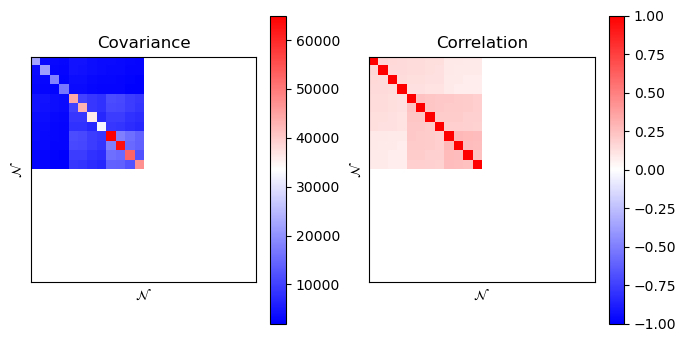

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(8,4))

plot_cov_corr(cov_from_file, fig, ax)


We can also show the gaussian and SSC contributions to the covariance independently, shown below

In [14]:
cov_terms = cc.get_covariance_terms()
gaussian = correlation(cov_terms['gauss'])
ssc = correlation(cov_terms['SSC'])

Text(0.5, 0.98, 'Correlation from terms')

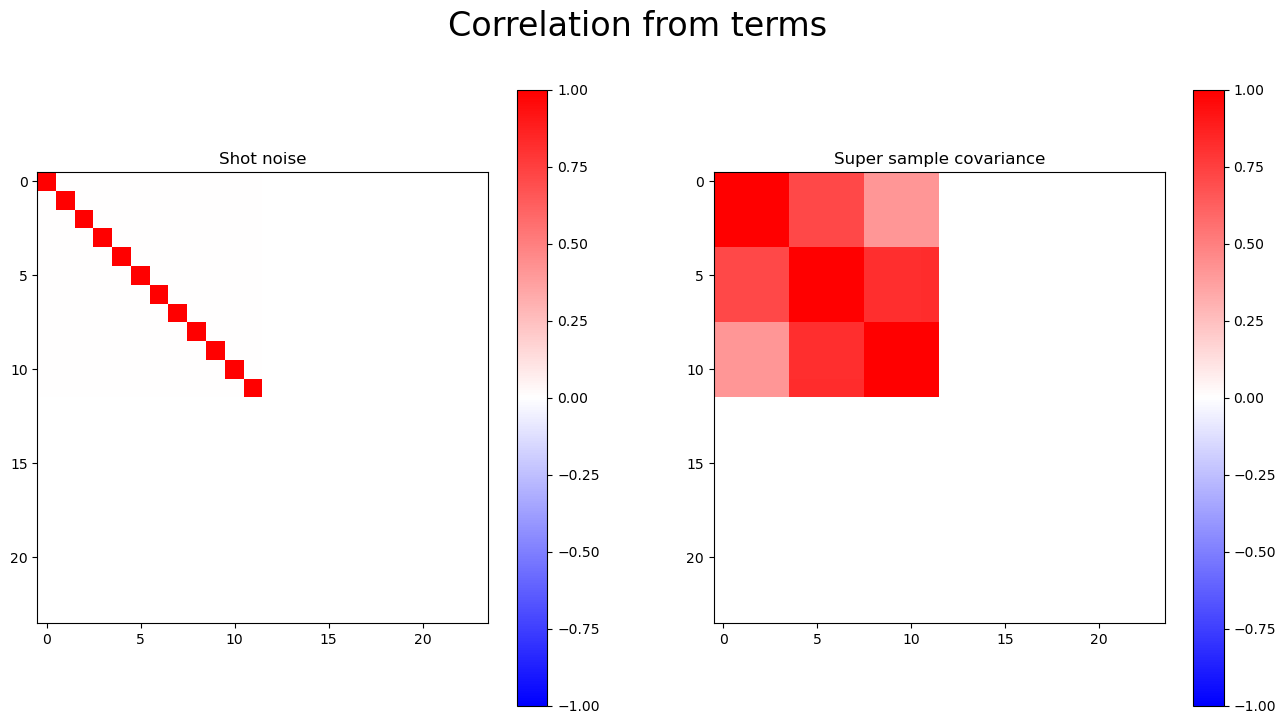

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))
im1 = ax1.imshow(gaussian, cmap='bwr', vmax=1, vmin=-1)
im2 = ax2.imshow(ssc, cmap='bwr', vmax=1, vmin=-1)
ax1.set_title('Shot noise')
ax2.set_title('Super sample covariance')

plt.colorbar(im1, ax=ax1)
plt.colorbar(im2, ax=ax2)
plt.suptitle('Correlation from terms', fontsize=24)

Text(0.5, 0.98, 'Covariance from terms')

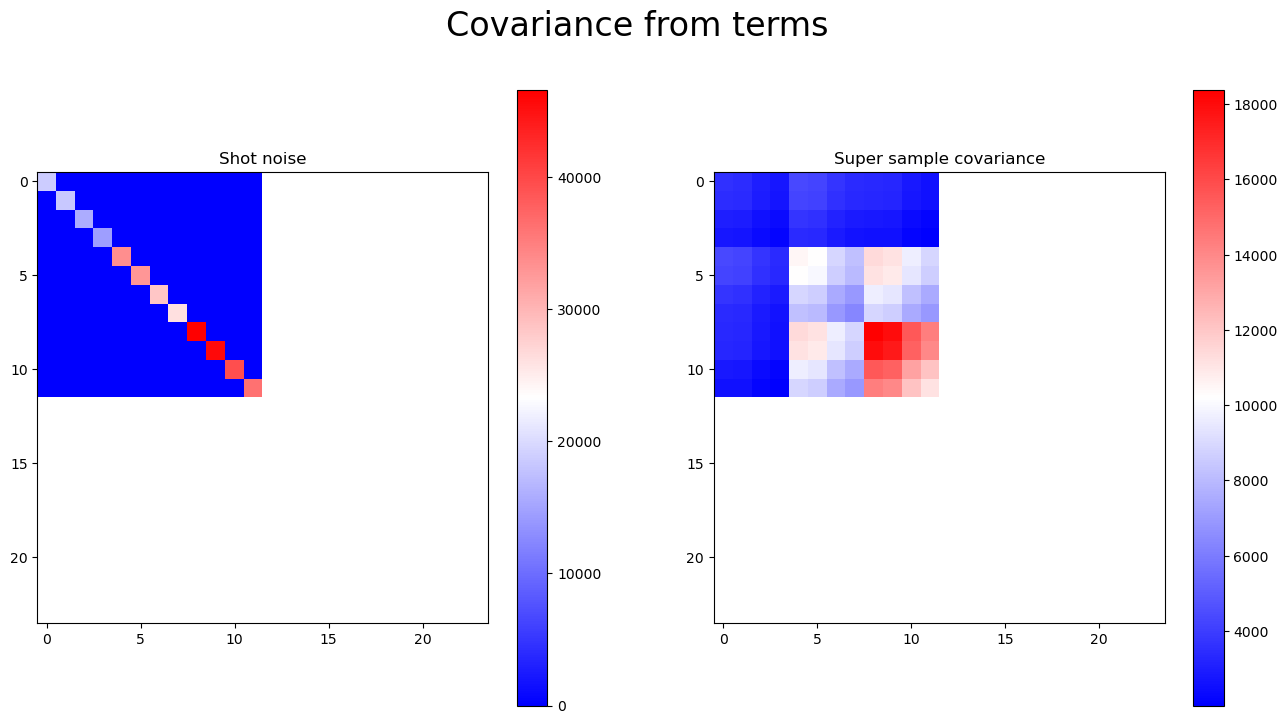

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))
im1 = ax1.imshow(cov_terms['gauss'], cmap='bwr')
im2 = ax2.imshow(cov_terms['SSC'], cmap='bwr')
ax1.set_title('Shot noise')
ax2.set_title('Super sample covariance')

plt.colorbar(im1, ax=ax1)
plt.colorbar(im2, ax=ax2)
plt.suptitle('Covariance from terms', fontsize=24)